# Client Retention and Gender Analysis

This notebook analyzes the `clients_months.csv` dataset to understand client retention, gender distribution, and gym attendance frequency.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('../data/04-processed/gym_routines_by_month.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%Y')

# Display first few rows
df.head()

,client_id,date,gender,day
0,0,2023-01-01,M,1
1,0,2022-08-01,M,1
2,0,2022-09-01,M,1
3,0,2022-11-01,M,1
4,1,2024-01-01,M,3


## 1. Gender Analysis

Let's look at the distribution of clients by gender.

C:\Users\alejo\AppData\Local\Temp\ipykernel_9776\3273218359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', order=['F', 'M'], palette={'F': 'salmon', 'M': 'skyblue'})


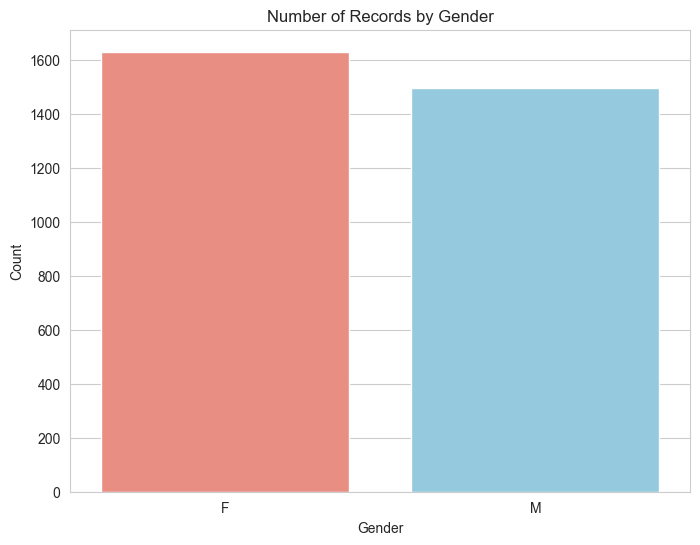

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', order=['F', 'M'], palette={'F': 'salmon', 'M': 'skyblue'})
plt.title('Number of Records by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Unique clients by gender:
gender
F    332
M    274
Name: count, dtype: int64


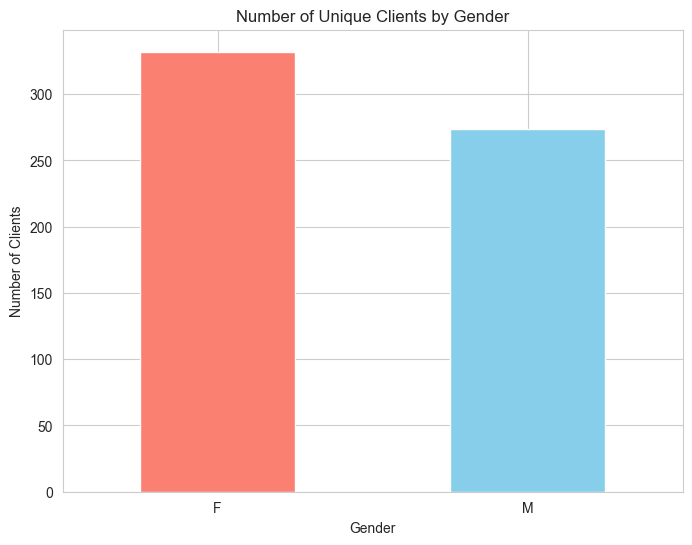

In [5]:
# Unique clients by gender
unique_clients_gender = df.drop_duplicates(subset=['client_id'])['gender'].value_counts()
print("Unique clients by gender:")
print(unique_clients_gender)

plt.figure(figsize=(8, 6))
unique_clients_gender.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Number of Unique Clients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.show()

## 2. Retention Analysis (Cohort Analysis)

We will perform a cohort analysis to track client retention over time. 
A cohort is defined as a group of users who started their activity in the same month.

In [21]:
# 1. Assign cohort month (first month of activity for each client)
df['cohort_month'] = df.groupby('client_id')['date'].transform('min')

# 2. Calculate cohort index (number of months since start)
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

activity_year, activity_month = get_date_int(df, 'date')
cohort_year, cohort_month = get_date_int(df, 'cohort_month')

years_diff = activity_year - cohort_year
months_diff = activity_month - cohort_month

df['cohort_index'] = years_diff * 12 + months_diff + 1

# 3. Count monthly active customers from each cohort
grouping = df.groupby(['cohort_month', 'cohort_index'])
cohort_data = grouping['client_id'].apply(pd.Series.nunique).reset_index()

# 4. Create pivot table
cohort_counts = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='client_id')

# 5. Calculate retention rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Format index for better readability in plot
retention.index = retention.index.strftime('%Y-%m')

retention.fillna(0, inplace=True)
retention.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
cohort_month,,,,,,,,,,,,,,,,,,,,,
2022-07,1.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-08,1.0,0.388889,0.722222,0.500000,0.277778,0.305556,0.250000,0.388889,0.388889,0.500000,...,0.111111,0.166667,0.111111,0.055556,0.055556,0.166667,0.138889,0.111111,0.111111,0.055556
2022-09,1.0,0.714286,0.428571,0.142857,0.500000,0.142857,0.214286,0.142857,0.142857,0.071429,...,0.000000,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.000000,0.071429,0.000000
2022-10,1.0,0.533333,0.466667,0.333333,0.266667,0.200000,0.266667,0.466667,0.400000,0.466667,...,0.133333,0.133333,0.200000,0.200000,0.266667,0.000000,0.200000,0.133333,0.000000,0.000000
2022-11,1.0,0.461538,0.384615,0.307692,0.076923,0.153846,0.153846,0.153846,0.153846,0.230769,...,0.076923,0.000000,0.076923,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000


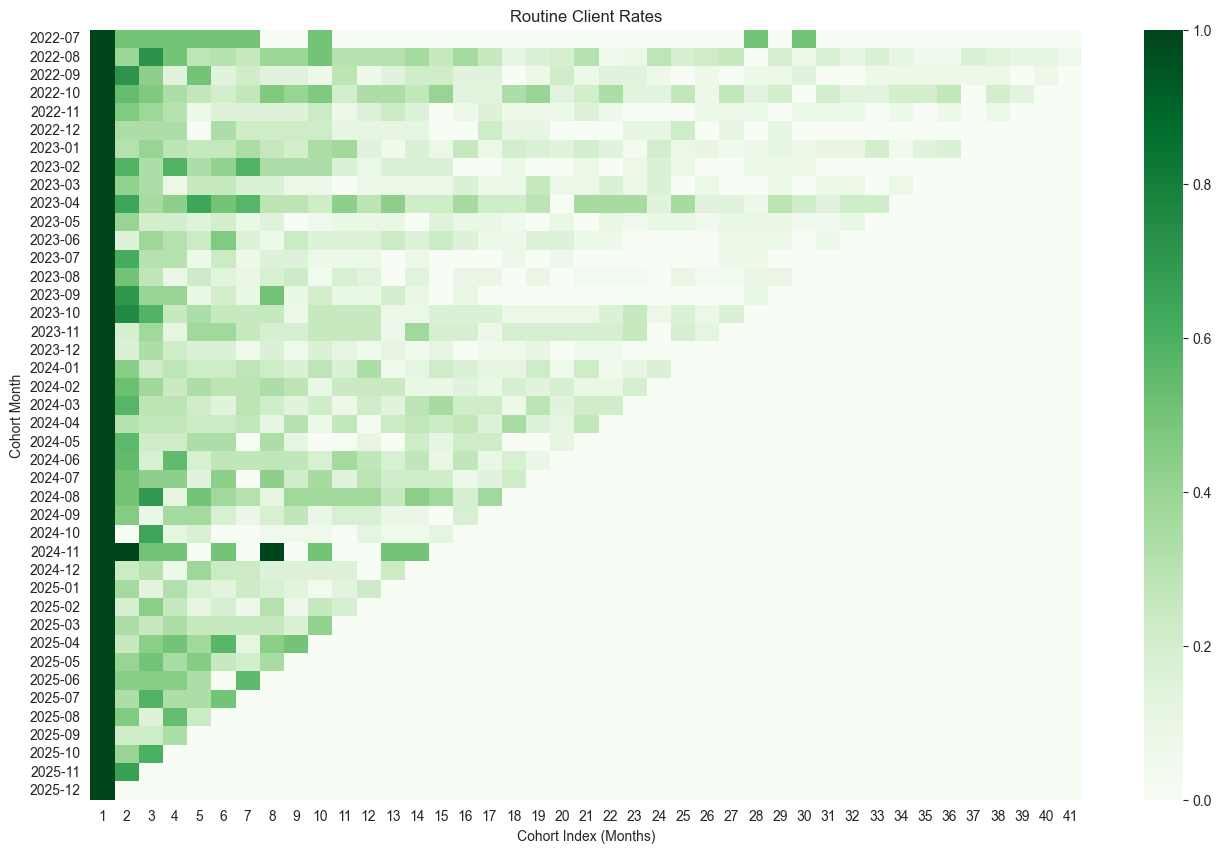

In [28]:
plt.figure(figsize=(16, 10))
sns.heatmap(retention, fmt='.0%', cmap='Greens')
plt.title('Routine Client Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months)')
plt.show()

## 3. Days per Routine Analysis

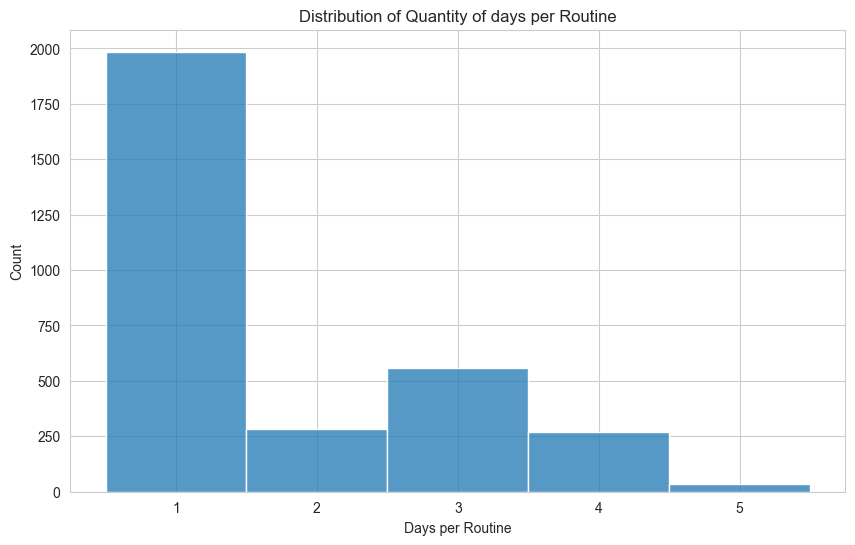

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['day'], bins=range(1, 9), kde=False, discrete=True)
plt.title('Distribution of Quantity of days per Routine')
plt.xlabel('Days per Routine')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.show()

Average days per week by gender:
gender
F    1.476395
M    2.042781
Name: day, dtype: float64


C:\Users\alejo\AppData\Local\Temp\ipykernel_9776\1967391329.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='day', palette='Set2')


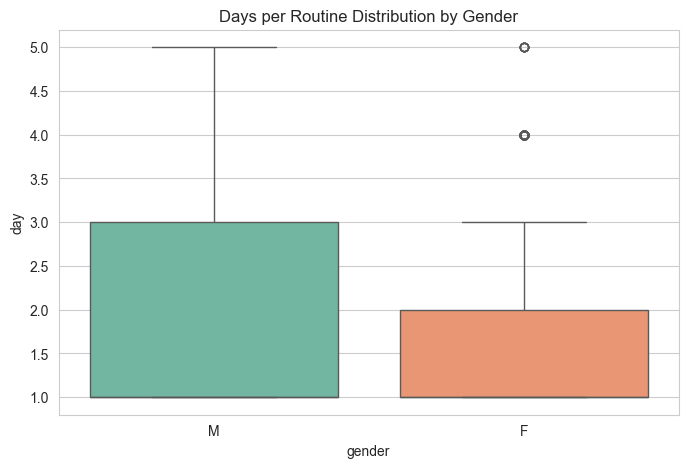

In [ ]:
# Average days per routine by gender
avg_days_gender = df.groupby('gender')['day'].mean()
print("Average days per routine by gender:")
print(avg_days_gender)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='day', palette='Set2')
plt.title('Days per Routine Distribution by Gender')
plt.show()

## 4. Count by Date

Here we visualize the number of active client records per month.

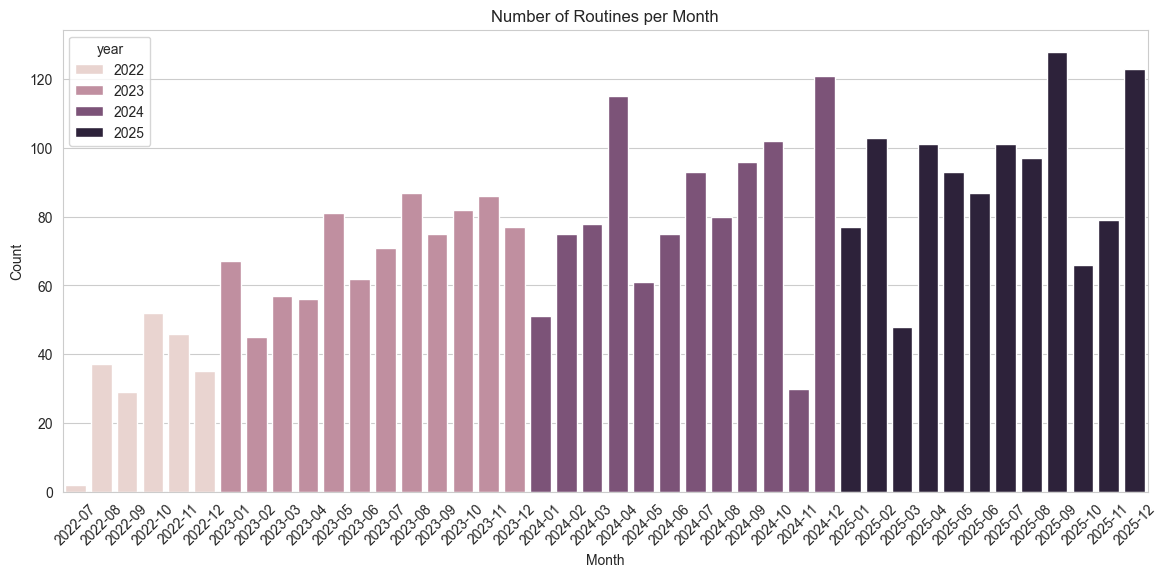

In [10]:
plt.figure(figsize=(14, 6))
# Format dates as strings for the x-axis labels to be cleaner
df['date_str'] = df['date'].dt.strftime('%Y-%m')
df['year'] = df['date'].dt.year
sns.countplot(data=df.sort_values('date'), x='date_str', hue='year', dodge=False)
plt.title('Number of Routines per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Number of clients per year

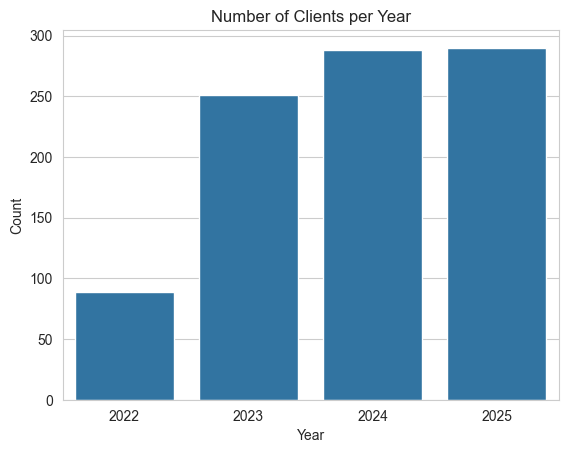

In [11]:
clients_by_year = df.drop_duplicates(subset=['year', 'client_id'])
sns.countplot(data=clients_by_year, x='year')
plt.title('Number of Clients per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Routines per client

In [35]:
routines_per_client = df.groupby("client_id").describe()["date"]["count"]

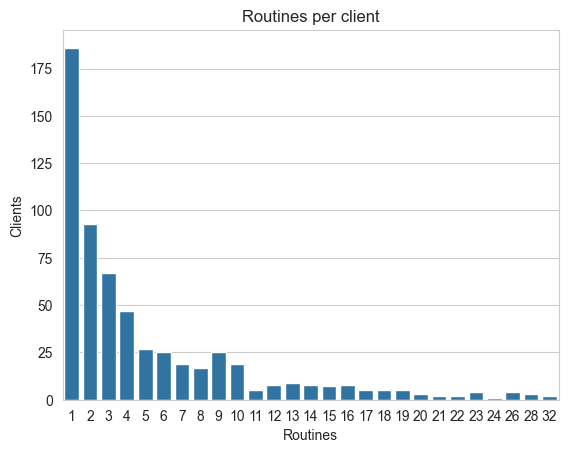

In [40]:
sns.countplot(x=routines_per_client)
plt.title("Routines per client")
plt.xlabel("Routines")
plt.ylabel("Clients")
plt.show()